In [ ]:
!pip install torch

## Creating an ANN using PyTorch

In [ ]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
import pandas.util.testing as tm
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """Entry point for launching an IPython kernel.


In [ ]:
import numpy as np

df['Outcome'] = np.where(df['Outcome']==1, "Diabetic", "No Diabetic")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,No Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,No Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


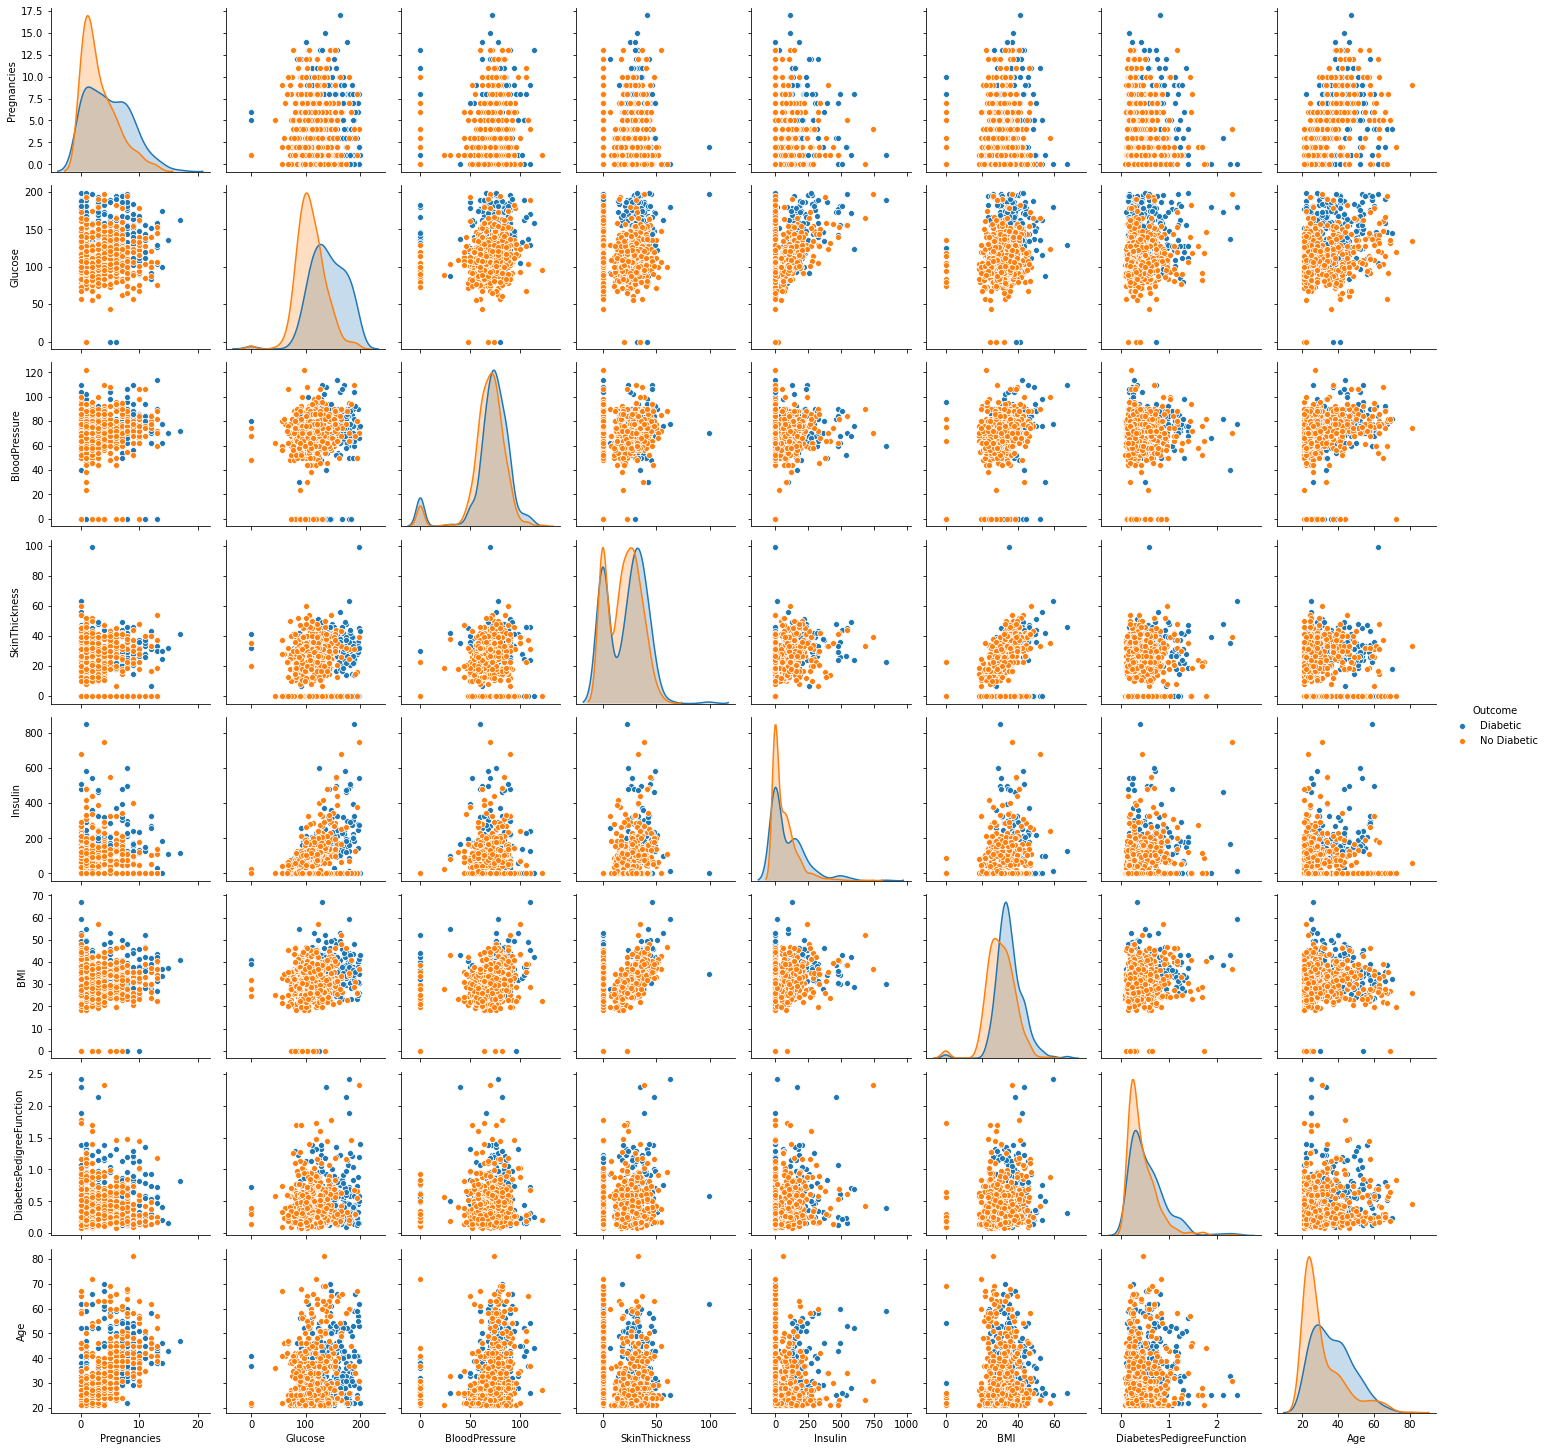

In [ ]:
sns.pairplot(df, hue="Outcome")

In [ ]:
df = pd.read_csv('diabetes.csv')

In [ ]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Creating Tensors

In [ ]:
# Libraries from PyTorch

import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Creating Tensors

# All the independent features have to be converted into a Float Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

### Creating Model with PyTorch

In [ ]:
df.shape

(768, 9)

In [ ]:
# Always have to define a class when creating a model (2 Functions)

class ANN_Model(nn.Module):
  
  def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
    super().__init__()
    self.f_connected1=nn.Linear(input_features, hidden1)
    self.f_connected2=nn.Linear(hidden1, hidden2)
    self.out = nn.Linear(hidden2, out_features)
  def forward(self, x):
    x=F.relu(self.f_connected1(x))
    x=F.relu(self.f_connected2(x))
    x=self.out(x)
    return x

In [ ]:
# Instantiate my ANN_Model

torch.manual_seed(20)
model=ANN_Model()

In [ ]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [ ]:
# Backward Propogation -- Define the Loss Function and also define the Optimizer

loss_function = nn.CrossEntropyLoss()     # -- For MultiClass problem
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 500
final_losses = []
for i in range(epochs):
  i = i + 1
  y_pred = model.forward(X_train)
  loss = loss_function(y_pred, y_train)
  final_losses.append(loss)

  if i%10 == 1:
    print("Epoch number: {} and the loss is: {}".format(i, loss.item()))
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch number: 1 and the loss is: 3.457212209701538
Epoch number: 11 and the loss is: 0.8019213080406189
Epoch number: 21 and the loss is: 0.6090323328971863
Epoch number: 31 and the loss is: 0.5917772054672241
Epoch number: 41 and the loss is: 0.5679708123207092
Epoch number: 51 and the loss is: 0.5529038906097412
Epoch number: 61 and the loss is: 0.5410095453262329
Epoch number: 71 and the loss is: 0.5310391187667847
Epoch number: 81 and the loss is: 0.522036075592041
Epoch number: 91 and the loss is: 0.5135970115661621
Epoch number: 101 and the loss is: 0.5061254501342773
Epoch number: 111 and the loss is: 0.4983409643173218
Epoch number: 121 and the loss is: 0.4960549771785736
Epoch number: 131 and the loss is: 0.4828638434410095
Epoch number: 141 and the loss is: 0.4756038784980774
Epoch number: 151 and the loss is: 0.4833468496799469
Epoch number: 161 and the loss is: 0.4882737398147583
Epoch number: 171 and the loss is: 0.46933555603027344
Epoch number: 181 and the loss is: 0.466

In [ ]:
# Plotting the loss function

import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

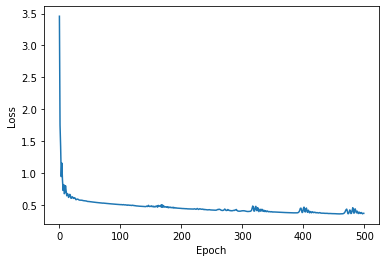

In [ ]:
plt.plot(range(epochs), final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

### Prediction from the ANN Model

In [ ]:
predictions = []

with torch.no_grad():
  for i, data in enumerate(X_test):
    y_pred = model(data)
    predictions.append(y_pred.argmax().item())
    print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [ ]:
predictions

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

[[92 15]
 [16 31]]


Text(69.0, 0.5, 'Predicted Values')

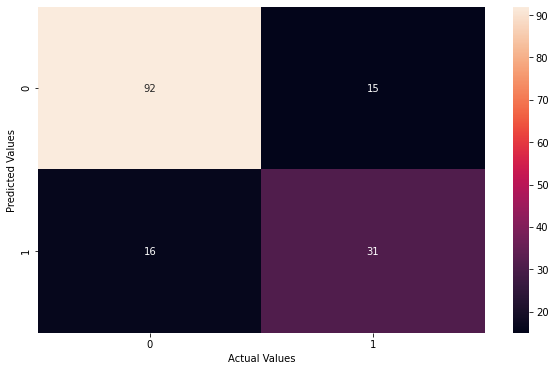

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
print(score)

0.7987012987012987


### Saving the Model

In [ ]:
torch.save(model, 'diabetes.pt')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type ANN_Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [ ]:
model = torch.load('diabetes.pt')

In [ ]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

### Prediction of New Data Point

In [ ]:
list(df.iloc[0, :-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [ ]:
lst1 = [6.0, 135.0, 72.0, 40.0, 0.0, 23.6, 0.627, 45.0]

In [ ]:
new_data = torch.tensor(lst1)

In [ ]:
with torch.no_grad():
  print(model(new_data))
  print(model(new_data).argmax().item())

tensor([1.5731, 0.9671])
0
